# Section 01:Exploratory Data Analysis


* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given Data?
* Do you notice any patterns or anomalies in the Data? can you plot them?

In [187]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [188]:
# Load Dataset
df=pd.read_csv("Desktop\Data\marketing_data.csv")

In [189]:
# Display all columns from Dataset
pd.set_option("display.max_columns",None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [190]:
# Determine number of rows & columns
df.shape

(2240, 28)

In [191]:
# Basic matrics
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [192]:
# Check features, datatype & null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Observations:

 * Feature "Income" with space at the beginning
 * Feature "Income" with null values
 * Feature "Income" is of datatype "object"
 * Feature "Income" with missing values

Next steps:

 * Remove white spaces
 * Convert "Income" to datatype float
 * Imputation of null values for feature "Income"

In [193]:
# Remove white spaces
df.columns = df.columns.str.replace(' ','')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [194]:
# Delete $ symbole from "Income" column
df["Income"] = df["Income"].str.replace('$','')

# Delete "," 
df["Income"] = df["Income"].str.replace(',','')

# Convert string to float
df["Income"] = df["Income"].astype("float")

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observations:

* Null values in feature "Income"

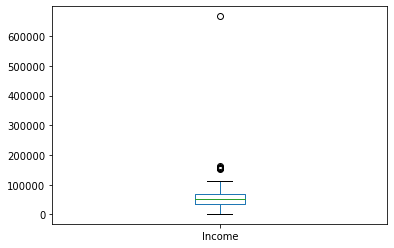

In [196]:
# Boxplot of "Income"
df["Income"].plot(kind="box")

Observations:

* There are outliers in feature "Income".
      Some customers have a very high income => Most likely natural outliers, will leave them as they are.

In [197]:
# Impute null values with median to minimize the effect of outliers
df["Income"] = df["Income"].fillna(df["Income"].median())

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Year_Birth                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
Income                  AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Kidhome                 AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Teenhome                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Recency                   AxesSubplot(0.125,0.518913;0.168478x0.16413)
MntWines               AxesSubplot(0.327174,0.518913;0.168478x0.16413)
MntFruits              AxesSubplot(0.529348,0.518913;0.168478x0.16413)
MntMeatProducts        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
MntFishProducts           AxesSubplot(0.125,0.321957;0.168478x0.16413)
MntSweetProducts       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
MntGoldProds           AxesSubplot(0.529348,0.321957;0.168478x0.16413)
NumDealsPurchases      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
NumWebPurchases              AxesSubplot(0.125,0.125;0.168478x0.16413)
NumCatalogPurchases       AxesSubplot(0.327174,0.125;0.168478x0.16413)
NumSto

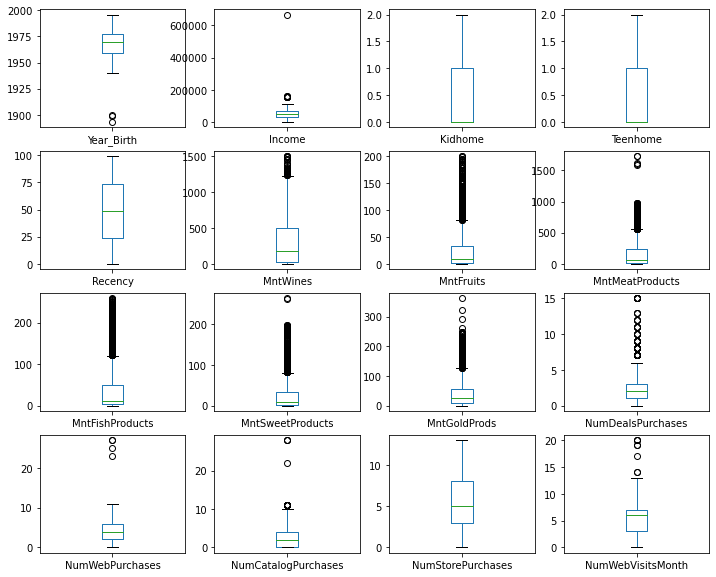

In [199]:
# Plot numerical variables
df_plot = df.drop(["ID","Education","Marital_Status","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3",
                   "AcceptedCmp4","AcceptedCmp5","Response","Complain"],axis=1)

df_plot.plot(subplots=True, layout=(4,4),kind="box",figsize=(12,10))

Observations:
     * Outliers can be found in many columns, probably due to individual buying behivour.
     * Birth_Date before 1900 not plausible.

Next step:
     * Convert "Year_Birth" to "Age".
     * Impute values for ages >  120.

In [200]:
# Convert birthdate to age
now = datetime.datetime.now()
df["Age"] = now.year - df["Year_Birth"]

In [201]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32


In [202]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,52.194196
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,128.000000


In [203]:
# Check Correlations with "Age" feature
df_corr = df.corr(method = "kendall").unstack().sort_values(kind = "quicksort",ascending = False).reset_index()

df_corr.rename(columns = {"level_0":"Feature_1","level_1":"Feature_2",0:"Correlation Coefficient"},inplace = True)

df_corr[df_corr["Feature_1"] == "Age"]

,Feature_1,Feature_2,Correlation Coefficient
0,Age,Age,1.000000
127,Age,Teenhome,0.316054
195,Age,MntWines,0.161118
203,Age,Income,0.151713
216,Age,NumCatalogPurchases,0.131685
223,Age,NumStorePurchases,0.119001
227,Age,NumWebPurchases,0.116628
255,Age,MntMeatProducts,0.078941
266,Age,NumDealsPurchases,0.065301
269,Age,AcceptedCmp4,0.055132


Observations:
     * No strong Correlation of "Age" with other feature => will impute null values with median

In [204]:
df["Age"].median

<bound method Series.median of 0       51
1       60
2       63
3       54
4       32
        ..
2235    45
2236    44
2237    45
2238    43
2239    52
Name: Age, Length: 2240, dtype: int64>

In [205]:
df["Age"] = np.where (df["Age"] > 120, 51, df["Age"])
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,52.096875
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,11.694144
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000


Feature engineering:
     * Minors = kidhome + Teenhome
     * Total amount spent = Amount spent for wine + fruits + meat + fish + sweet + gold
     * Number of all purchases = purchases in stores + catalog + web + deals
     * Remote purchases = purchases in catalog + web
     * Marketing responsiveness = AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + response

Transformations:
     * Feature "Dt_Customer" convert to "cust_since"
     * Delete "Year_Birth", but keep "Age"

In [206]:
# Minors in household
df["minors"] = df["Kidhome"] + df["Teenhome"]

# Convert Dt_Customer to cust_since
df["cust_since"] = pd.DatetimeIndex(df["Dt_Customer"]).year
df = df.drop(["Dt_Customer"],axis=1)

# Total amount spent
df["Totalamt"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# Amount spent on luxury items
df["Luxamt"] = df["MntWines"] + df["MntGoldProds"]

# Number of total purchases
df["Numpurchases"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

# Number of remote purchases
df["Rempurchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"]

# Marketing responsiveness
df["Responsiveness"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"] + df["Response"]

# Drop "Year_Birth"
df = df.drop(["Year_Birth"],axis = 1)

df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,minors,cust_since,Totalamt,Luxamt,Numpurchases,Rempurchases,Responsiveness
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,2014,1190,407,15,8,1
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,2014,577,501,18,10,2
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,2014,251,164,11,5,0
3,1386,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,2014,11,10,4,1,0
4,5371,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,2014,91,40,8,4,2


In [207]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'minors', 'cust_since',
       'Totalamt', 'Luxamt', 'Numpurchases', 'Rempurchases', 'Responsiveness'],
      dtype='object')

## Explore dataset with Correlation Matrix

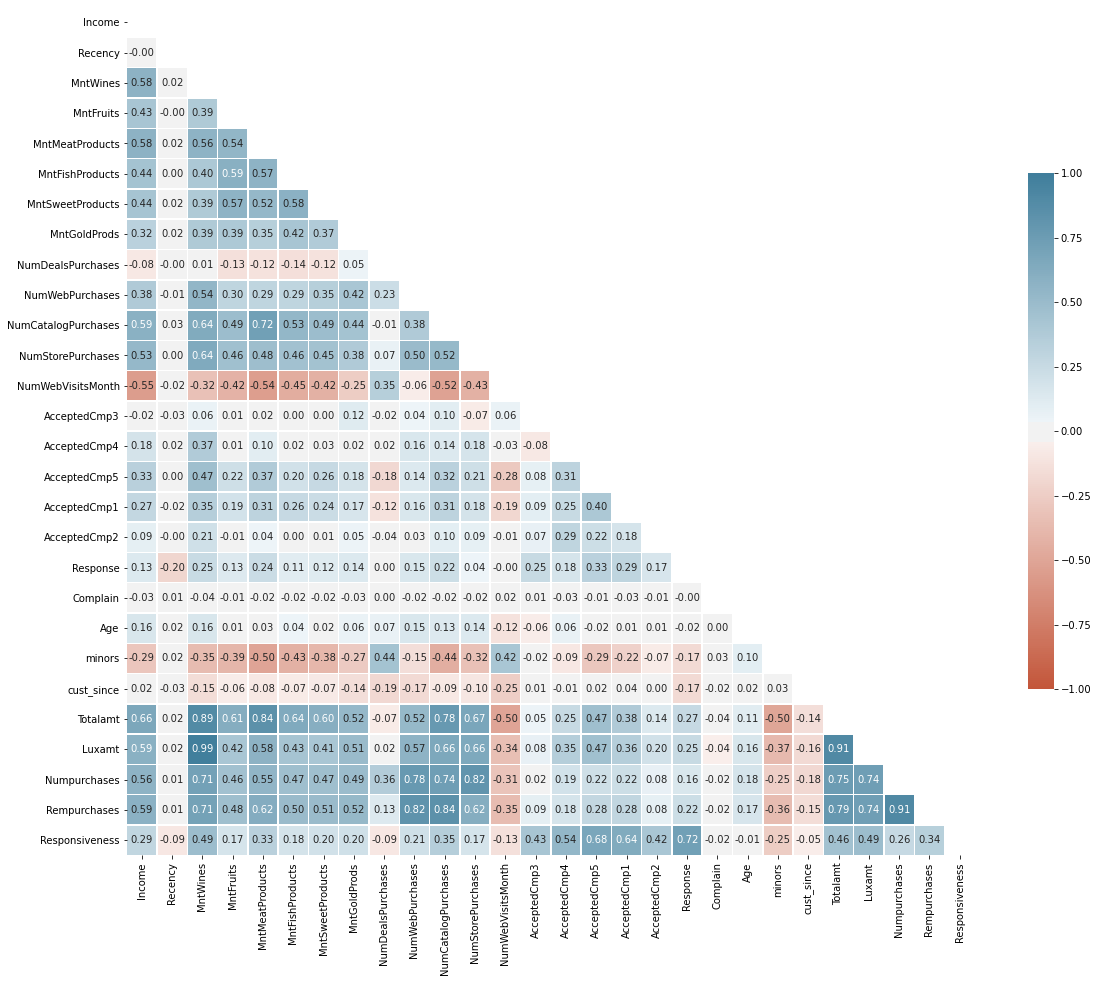

In [208]:
df_corr = df.drop(columns = ["ID", "Kidhome", "Teenhome"]).select_dtypes(include = np.number)

# Compute the Correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype = bool))

# Set up the Matplotlib figure
f,ax = plt.subplots(figsize =(19,19))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap = True)

# Draw the heatmap with the mask and correct aspet ratio
sns.heatmap(corr,mask = mask , cmap = cmap, vmin = -1, vmax = 1, annot = True, fmt = ".2f", center = 0,
             square = True, linewidths = .5, cbar_kws = {"shrink" : .5})

## Explore effects of Income

In [209]:
df_corr = df.corr(method = "kendall").unstack().sort_values(kind = "quicksort", ascending = False).reset_index()

df_corr.rename(columns = {"level_0":"Feature_1", "level_1":"Feature_2", 0:"Correlation Coefficient"}, inplace = True)

df_corr[df_corr["Feature_1"] == "Income"]

,Feature_1,Feature_2,Correlation Coefficient
27,Income,Income,1.000000
75,Income,Totalamt,0.648146
86,Income,MntWines,0.629475
96,Income,NumCatalogPurchases,0.614858
98,Income,MntMeatProducts,0.614752
99,Income,Luxamt,0.607382
111,Income,Rempurchases,0.551582
121,Income,NumStorePurchases,0.541541
146,Income,Numpurchases,0.499036
201,Income,NumWebPurchases,0.400976


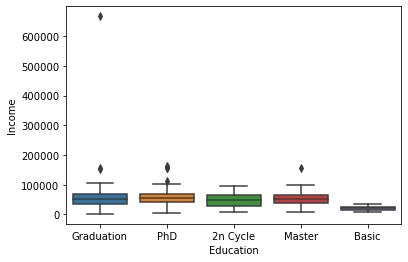

In [210]:
sns.boxplot(x = "Education", y = "Income", data = df)

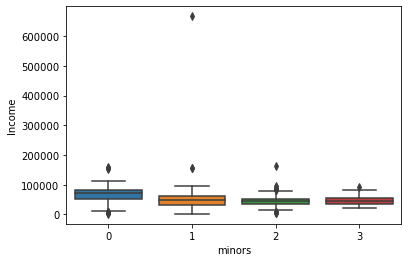

In [211]:
sns.boxplot(x = "minors", y = "Income", data = df)

Observations:

 Income is strongly positive correlated with:
      * Total amount spent.
      * Number of purchases.
      * Amount spent for wines.
      * Amount spent for meat.
      * Total amount spent for luxury items.
      * Number of catalog purchasems.
      * Number of store purchases.
      * Higher education 

 Income is negetively correlated with:
      * Monthly website visits
      * Presence of minors in the household

Income is a key determinant of demand and depending on goods and the relationship between income and demand can be
both, direct and inverse. In case of Luxury goods, income and demand are directly related. In case of inferior goods(e.g. basic food), income & demand are inversely related. This relationship has been described by Ernst Engel in Engel's Law.

## Effect of minors

In [212]:
df_corr = df.corr(method = "kendall").unstack().sort_values(kind = "quicksort", ascending = False).reset_index()

df_corr.rename(columns = {"level_0":"Feature_1", "level_1":"Feature_2", 0:"Correlation Coefficient"}, inplace = True)

df_corr[df_corr["Feature_1"] == "minors"]

,Feature_1,Feature_2,Correlation Coefficient
5,minors,minors,1.000000
71,minors,Teenhome,0.661586
79,minors,Kidhome,0.638642
159,minors,NumDealsPurchases,0.475895
224,minors,NumWebVisitsMonth,0.355836
450,minors,Age,0.075520
507,minors,Complain,0.028375
511,minors,cust_since,0.027438
566,minors,Recency,0.009708
611,minors,ID,0.000138


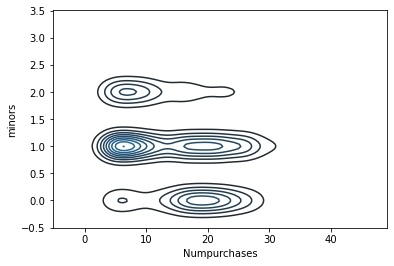

In [213]:
sns.kdeplot(df["Numpurchases"], df["minors"])

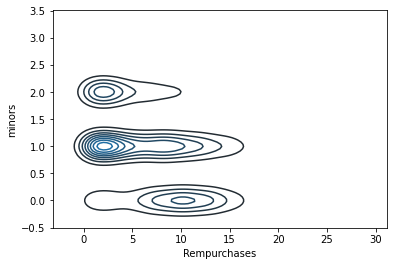

In [214]:
sns.kdeplot(df["Rempurchases"], df["minors"])

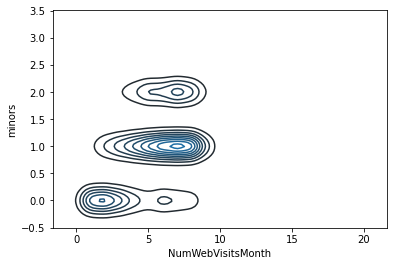

In [215]:
sns.kdeplot(df["NumWebVisitsMonth"], df["minors"])

Observations:

The presence of minors in the household is positively correlated with:
    * Number of deals purchased
    * Number of monthly website visits
  
  
The presence of minors inthe household is negetively correlated with:
    * Total amount spent
    * Amount spent on fish
    * Amount spent on meat
    * Amount spent on sweets
    * Amount spent on fruits
    * Amount spent on luxury items
    * Number of catalog purchases
    * Number of remote purchases
    * number of store purchases
    * Income
    
Presence of minor is negatively correlated with income and, in line with Engel's Law, with the total amount spent.
with more minor in the household, fewer purchases as done remotely, despite a higher number of webdite visits.

## Customer loyalty, recency, satisfaction and campaign responsiveness

In [216]:
df_corr = df.corr(method = "kendall").unstack().sort_values(kind = "quicksort", ascending = False).reset_index()

df_corr.rename(columns = {"level_0":"Feature_1", "level_1":"Feature_2", 0:"Correlation Coefficient"}, inplace = True)

df_corr[df_corr["Feature_1"] == "Responsiveness"]

,Feature_1,Feature_2,Correlation Coefficient
0,Responsiveness,Responsiveness,1.000000
58,Responsiveness,Response,0.696484
137,Responsiveness,AcceptedCmp5,0.509746
158,Responsiveness,AcceptedCmp4,0.478122
164,Responsiveness,AcceptedCmp1,0.473497
170,Responsiveness,AcceptedCmp3,0.457126
240,Responsiveness,Luxamt,0.323353
250,Responsiveness,NumCatalogPurchases,0.311756
251,Responsiveness,Totalamt,0.309961
254,Responsiveness,MntWines,0.307643


Observations:

Responsiveness is positively correlated with:
    * Amount spent on luxury items
    * Number of catalog purchases
    * Total amount spent
    * Amount spent on wines
    * Number of remote purchases
    * Amount spent on meat
    
Responsiveness is negatively correlated with:
    * Number of deals purchases   

We do not have any details on the type of marketing activites and what products/channels they are promoted. The dtat
suggest that the marketing activities had a stronger effects on purchases of luxury goods and remote purchases.

In [217]:
df_corr = df.corr(method = "kendall").unstack().sort_values(kind = "quicksort", ascending = False).reset_index()

df_corr.rename(columns = {"level_0":"Feature_1", "level_1":"Feature_2", 0:"Correlation Coefficient"}, inplace = True)

df_corr[df_corr["Feature_1"] == "Recency"]

,Feature_1,Feature_2,Correlation Coefficient
24,Recency,Recency,1.000000
517,Recency,NumCatalogPurchases,0.021745
530,Recency,MntMeatProducts,0.019052
534,Recency,MntFruits,0.017064
538,Recency,MntSweetProducts,0.016050
541,Recency,AcceptedCmp4,0.015437
545,Recency,Age,0.013816
548,Recency,Totalamt,0.013394
549,Recency,Luxamt,0.012890
553,Recency,MntGoldProds,0.012306


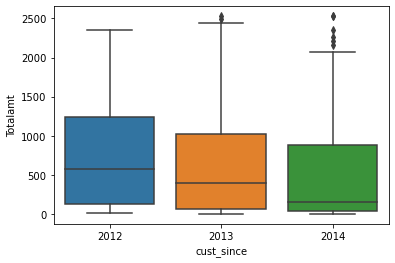

In [218]:
sns.boxplot(x = "cust_since",y = "Totalamt", data = df)

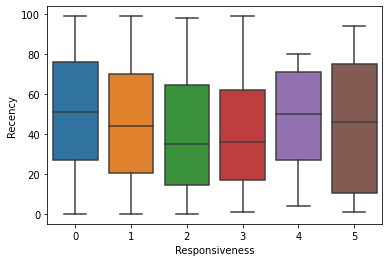

In [219]:
sns.boxplot(x = "Responsiveness",y = "Recency", data = df)

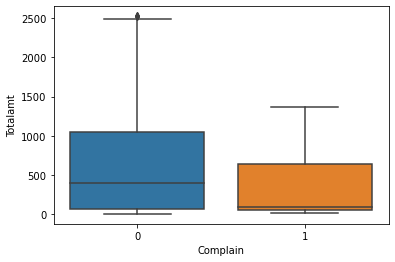

In [220]:
sns.boxplot(x = "Complain",y = "Totalamt", data = df)

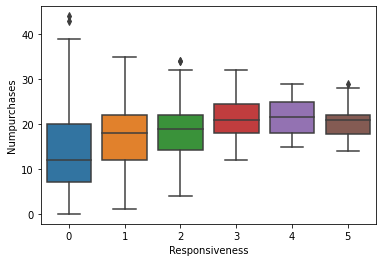

In [221]:
sns.boxplot(x = "Responsiveness",y = "Numpurchases", data = df)

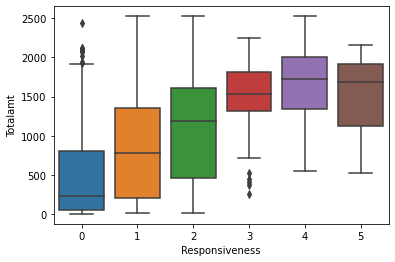

In [222]:
sns.boxplot(x = "Responsiveness",y = "Totalamt", data = df)

Observations:
    
    * Total amount spent in negetively correlated with date of enrollment with the customer => customer are loyal
    * Customer that reponded to campaign 2 and 3 with the shortest time since last purchase
    * Customer that responded to campaign 4(5) made the (2nd)highest number of purchases and (2nd)most total amount
    * Customer with a camplaints spent less
    * No strong correlation for feature "Recency"

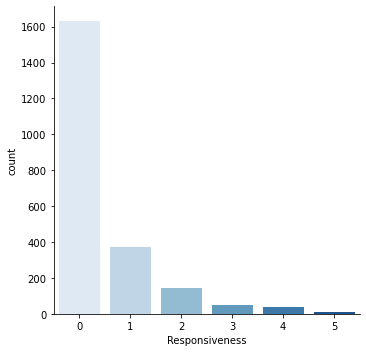

In [223]:
sns.catplot(x = "Responsiveness", kind = "count", palette = "Blues", data = df)

 The majority of the customer did not responded to any of the marketing campaigns

In [224]:
df_corr = df.corr(method = "kendall").unstack().sort_values(kind = "quicksort", ascending = False).reset_index()

df_corr.rename(columns = {"level_0":"Feature_1", "level_1":"Feature_2", 0:"Correlation Coefficient"}, inplace = True)

df_corr[df_corr["Feature_1"] == "NumWebVisitsMonth"]

,Feature_1,Feature_2,Correlation Coefficient
29,NumWebVisitsMonth,NumWebVisitsMonth,1.000000
196,NumWebVisitsMonth,Kidhome,0.412853
223,NumWebVisitsMonth,minors,0.355836
241,NumWebVisitsMonth,NumDealsPurchases,0.321810
431,NumWebVisitsMonth,Teenhome,0.095328
479,NumWebVisitsMonth,AcceptedCmp3,0.051619
520,NumWebVisitsMonth,Complain,0.021210
567,NumWebVisitsMonth,Response,0.009290
634,NumWebVisitsMonth,AcceptedCmp2,-0.004983
640,NumWebVisitsMonth,ID,-0.008022


Observations:
    
Monthly website visits are positively correlated with:
    * Number of deals purchases
    * Presence of minors

# Section 02 : Statistical Analysis

Statistical Analysis please run statistical tests in the form of regressions to answer there questions and propose 
data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO
can understand your findings

In [225]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'minors', 'cust_since',
       'Totalamt', 'Luxamt', 'Numpurchases', 'Rempurchases', 'Responsiveness'],
      dtype='object')

In [226]:
df_reg = df.drop(["ID"], axis = 1)
df_reg.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,minors,cust_since,Totalamt,Luxamt,Numpurchases,Rempurchases,Responsiveness
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,2014,1190,407,15,8,1
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,2014,577,501,18,10,2
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,2014,251,164,11,5,0
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,2014,11,10,4,1,0
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,2014,91,40,8,4,2


In [227]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    df = pd.concat([df, dummies], axis = 1)
    return df

df_reg = create_dummies(df_reg, "Education")
df_reg.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,minors,cust_since,Totalamt,Luxamt,Numpurchases,Rempurchases,Responsiveness,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,2014,1190,407,15,8,1,0,0,1,0,0
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,2014,577,501,18,10,2,0,0,1,0,0
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,2014,251,164,11,5,0,0,0,1,0,0
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,2014,11,10,4,1,0,0,0,1,0,0
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,2014,91,40,8,4,2,0,0,1,0,0


In [228]:
df_reg = create_dummies(df_reg, "Marital_Status")
df_reg = create_dummies(df_reg,"Country")
df_reg.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,minors,cust_since,Totalamt,Luxamt,Numpurchases,Rempurchases,Responsiveness,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,2014,1190,407,15,8,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,2014,577,501,18,10,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,2014,251,164,11,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,2014,11,10,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,2014,91,40,8,4,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [229]:
df_reg.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'minors', 'cust_since',
       'Totalamt', 'Luxamt', 'Numpurchases', 'Rempurchases', 'Responsiveness',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Country_AUS', 'Country_CA', 'Country_GER',
       'Country_IND', 'Country_ME', 'Country_SA', 'Country

In [230]:
df_reg_dropped = df_reg.drop(["Education", "Marital_Status", "Country", "NumStorePurchases"], axis = 1)
df_reg_dropped.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,minors,cust_since,Totalamt,Luxamt,Numpurchases,Rempurchases,Responsiveness,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,1,0,0,0,0,0,1,0,51,0,2014,1190,407,15,8,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,5,0,0,0,0,1,1,0,60,0,2014,577,501,18,10,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,2,0,0,0,0,0,0,0,63,1,2014,251,164,11,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,7,0,0,0,0,0,0,0,54,2,2014,11,10,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,7,1,0,0,0,0,1,0,32,1,2014,91,40,8,4,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [231]:
x = df_reg_dropped
y = df_reg["NumStorePurchases"]

In [232]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_reg_dropped, y, test_size = 0.2, random_state = 42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
reg = LinearRegression(normalize = True)
reg.fit(train_x, train_y)
y_pred = reg.predict(test_x)
mean_absolute_error(test_y, y_pred)

1.4765510281779544e-14

In [233]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(reg, random_state = 0).fit(test_x, test_y)
eli5.show_weights(perm, feature_names = test_x.columns.tolist(),top = 10)

Weight,Feature
10.9782 ± 0.7496,Numpurchases
0.7598 ± 0.0711,Rempurchases
0.6459 ± 0.0573,NumDealsPurchases
0.5142 ± 0.0236,NumWebPurchases
0.4671 ± 0.0712,NumCatalogPurchases
0.0000 ± 0.0000,Totalamt
0.0000 ± 0.0000,Responsiveness
0.0000 ± 0.0000,minors
0.0000 ± 0.0000,MntWines
0.0000 ± 0.0000,Kidhome


Most important features for number of store purchases are remote purchases, number of deals purchased, number of web
purchases and number of catalog purchases.

Text(0, 0.5, 'Number of purchases')

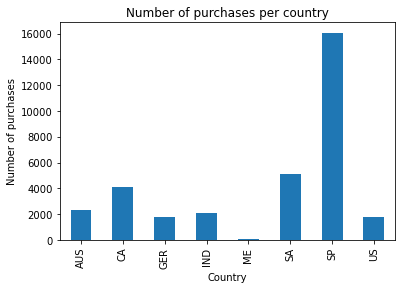

In [234]:
plt.figure()
df.groupby("Country")["Numpurchases"].sum().plot(kind = "bar")
plt.title("Number of purchases per country")
plt.ylabel("Number of purchases")

The US do not fare better than the rest of thr world in terms of total purchases. Spain, SouthAfrica, Canada, Australia and
India have a higher number of purchases campared US

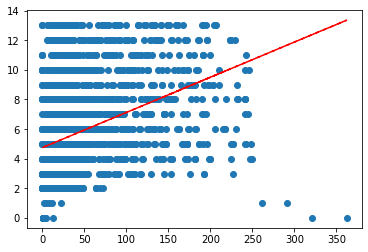

In [235]:
data = df[["MntGoldProds", "NumStorePurchases"]]
x = df["MntGoldProds"]
y = df["NumStorePurchases"]
plt.scatter(x,y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()

In [236]:
from scipy import stats
tau, p_value = stats.kendalltau(df["MntGoldProds"], df["NumStorePurchases"])
p_value

4.752746314649227e-152

People who spent an above average amount on gold have indeed more in stores purchases. This correlation is statistically
significant,however, this does not prove causation that people who spent money on gold are more conservative and prefer
buying in stores.

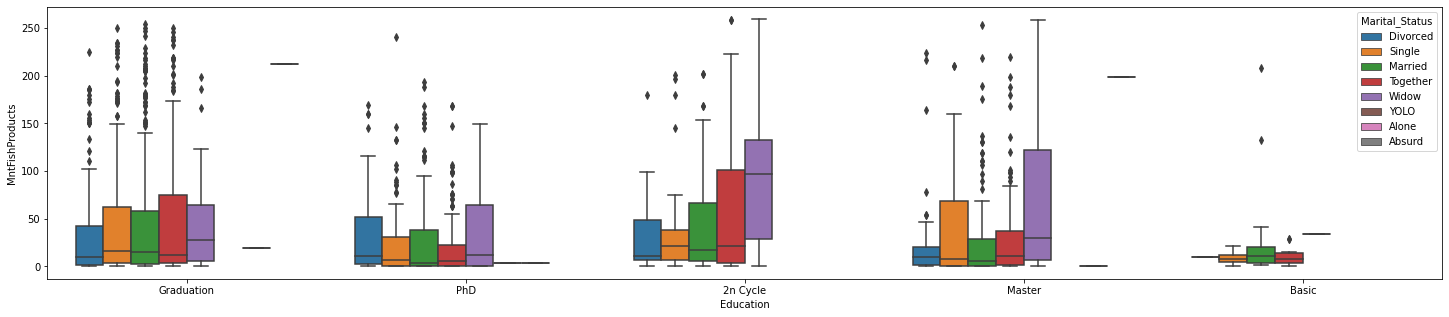

In [237]:
plt.figure(figsize = (25,5))
sns.boxplot(x = df["Education"], y = df["MntFishProducts"], hue = df["Marital_Status"])

Observations:
    
    Married phd candidtes do not spen more on fish products.

In [238]:
x = df_reg_dropped2 = df_reg.drop(["Education", "Marital_Status", "Country", "MntFishProducts"], axis = 1)
y = df_reg_dropped["MntFishProducts"]

In [239]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_reg_dropped2, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

reg = LinearRegression(normalize = True)
reg.fit(train_x, train_y)
y_pred = reg.predict(test_x)
mean_absolute_error(test_y, y_pred)

5.049657059064921e-13

In [240]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(reg, random_state=0).fit(test_x, test_y)
eli5.show_weights(perm, feature_names = test_x.columns.tolist(), top = 10)

Weight,Feature
326.2672 ± 22.2567,Totalamt
42.3584 ± 1.8337,MntMeatProducts
28.3247 ± 2.5335,MntWines
26.1310 ± 1.8121,Luxamt
1.4830 ± 0.1643,MntSweetProducts
1.3452 ± 0.1872,MntFruits
0.6931 ± 0.0722,MntGoldProds
0.0008 ± 0.0001,minors
0.0004 ± 0.0000,Kidhome
0.0004 ± 0.0000,Teenhome


Main factors related to the amount spent on fish are amounts spent on meat nd wines.

# Section 03: Data Visualization

Please plot and visualize the answers to below questions.
    * Which marketing campaign is most successful?
    * What does the average customer look like for this company?
    * Which products are performing best?
    * Which channels are underperforming?

Text(0, 0.5, '% Accepted')

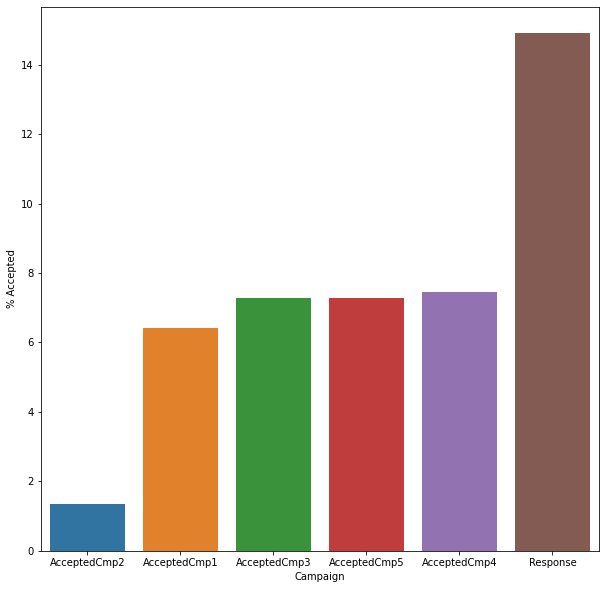

In [241]:
# Determine acceptance rate per campaign
campaign_acceptance_rate = pd.DataFrame(df[["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2",
                                            "Response"]].mean()*100, columns = ["Percent"]).reset_index()

# Plot
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.barplot(x="index", y="Percent", data = campaign_acceptance_rate.sort_values("Percent"))
plt.xlabel("Campaign")
plt.ylabel("% Accepted")

The most recent campaign had by far the highest acceptance rate.  

In [242]:
# Average Customer

# age
age = round(df["Age"].mean())

# Income
income = round(df["Income"].mean())

# Customer since
customer_since = round(df["cust_since"].mean())

# TotalAmountSpent
TotalAmountspent = round(df["Totalamt"].mean())

# Responsiveness
Responsiveness = df["Responsiveness"].mean()

# Number of Minors in Household
Minors = df["minors"].value_counts()

# Education
Education = df["Education"].value_counts()

# Marital_Status
Marital_Status = df["Marital_Status"].value_counts()

# Recency
Recency = round(df["Recency"].mean())

print("age =",age,"\n")
print("income =",income,"\n")
print("customer_since = ",customer_since,"\n")
print("TotalAmountSpent =",TotalAmountspent,"\n")
print("Responsiveness =",Responsiveness,"\n")
print(Minors,"\n")
print(Education,"\n")
print(Marital_Status,"\n")
print("Recency =",Recency,"\n")

age = 52 

income = 52238 

customer_since =  2013 

TotalAmountSpent = 606 

Responsiveness = 0.446875 

1    1128
0     638
2     421
3      53
Name: minors, dtype: int64 

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64 

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 

Recency = 49 



The Average Customer:
    * is 52 year old
    * earns around 52k USD
    * is a Customer since 2013
    * spent 606 USD in total
    * responded to 0.4 Markrting campaigns
    * has one minor in the Household
    * has graduated
    * is married
    * made the last purchase 49 days ago

In [243]:
# TotalAmountSpent

TotalAmountSpent_sum = round(df["Totalamt"].sum())
print("Total Revenues"+" = "+str(TotalAmountSpent_sum))


Wines_sum = round(df["MntWines"].sum())
print("Wines Revenues"+" = "+str(Wines_sum))


Fruits_sum = round(df["MntFruits"].sum())
print("Fruits Revenues"+" = "+str(Fruits_sum))


Meat_sum = round(df["MntMeatProducts"].sum())
print("Meat Revenues"+" = "+str(Meat_sum))


Fish_sum = round(df["MntFishProducts"].sum())
print("Fish Revenues"+" = "+str(Fish_sum))


Sweets_sum = round(df["MntSweetProducts"].sum())
print("Sweets Revenues"+" = "+str(Sweets_sum))


Gold_sum = round(df["MntGoldProds"].sum())
print("Gold Revenues"+" = "+str(Gold_sum))

Total Revenues = 1356988
Wines Revenues = 680816
Fruits Revenues = 58917
Meat Revenues = 373968
Fish Revenues = 84057
Sweets Revenues = 60621
Gold Revenues = 98609


Observations:
    * Wines are the best performing products
    * Meat products are the 2nd best performing
    * Gold products are the 3rd best performing

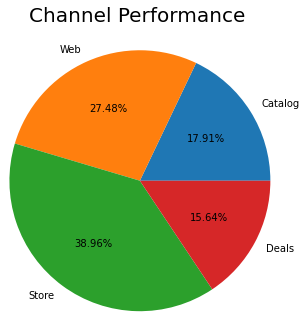

In [244]:
NumCatalogPurchases_Sum = round(df["NumCatalogPurchases"].sum())
NumWedPurchases_Sum = round(df["NumWebPurchases"].sum())
NumStorePurchases_Sum = round(df["NumStorePurchases"].sum())
NumDealsPurchases_Sum = round(df["NumDealsPurchases"].sum())

piechart_channel = np.array([NumCatalogPurchases_Sum, NumWedPurchases_Sum, NumStorePurchases_Sum, NumDealsPurchases_Sum])
mylabels = ["Catalog", "Web", "Store", "Deals"]
plt.pie(piechart_channel, labels = mylabels,autopct = "%1.2f%%", radius=(1.5))
plt.title("Channel Performance \n\n",size=20)
plt.show()